## Jupyter version of online digital ad tax calculators


This notebook uses the same data and code as the online digital ad tax calculators that are linked off of my website: 

- https://paulromer.net 

Please read the pages there for the motivation and background for these calculations. 

The online versions, generated by Iodide and Pyodide provide a better interface for these calculations. This notebook is intended only as a backstop reference. 


In [1]:
import matplotlib as mpl
import matplotlib.pyplot as plt
import matplotlib.ticker as mticker
import numpy as np 
import csv

In [2]:
%matplotlib inline

In [3]:

# Firm Data

# Net revenue is Gross revenue minus traffic acquisition costs.

# usdar: US Net Digital Advertising Revenue, largest firms, for years 2019, 2020, and 2021. 

usdar = {
    0: (4.8692555671E+10, 5.5509513465E+10, 6.2614731188E+10),
    1: (2.991583616E+10, 3.6187447709E+10, 4.2587310695E+10),
    2: (9.853362805E+09, 1.3055705717E+10, 1.6711303318E+10),
    3: (5.003217563E+09, 5.405300897E+09, 5.774427445E+09),
    4: (3.426060854E+09, 3.494582071E+09, 3.564473712E+09),
    5: (1.568695087E+09, 1.852327425E+09, 2.057533711E+09),
    6: (9.7601675E+08, 1.089362386E+09, 1.199512707E+09),
    7: (9.1613559E+08, 1.157537317E+09, 1.388435551E+09),
    8: (6.62116E+08, 8.2102384E+08, 9.77018369E+08),
    9: (5.5402892E+08, 5.65022671E+08, 5.82755263E+08),
    10: (5.19632279E+08, 8.1609255E+08, 1.048392945E+09),
    11: (4.68619857E+08, 5.64459119E+08, 6.48423203E+08),
    12: (1.18969313E+08, 1.8127011E+08, 2.61749898E+08),
}
############################################################

#  DATA SOURCE FOR usdar 
#
#     These estimates of digital advertising revenue net of traffic acquisition costs come from emarketer.com.
#          
#     https://www.emarketer.com/forecasts/584b26021403070290f93a4a/5851918a0626310a2c1869c3
#
#     They consolidate estimates for any subsidiary into the parent company. 

############################################################


# US Population / 2019

pop2019 = {
    "Alabama": 4903185,"Alaska": 731545,"Arizona": 7278717,"Arkansas": 3017804,
    "California": 39512223,"Colorado": 5758736,"Connecticut": 3565287,"Delaware": 973764,
    "District of Columbia": 705749,"Florida": 21477737,"Georgia": 10617423,"Hawaii": 1415872,
    "Idaho": 1787065,"Illinois": 12671821,"Indiana": 6732219,"Iowa": 3155070,
    "Kansas": 2913314,"Kentucky": 4467673,"Louisiana": 4648794,"Maine": 1344212,
    "Maryland": 6045680,"Massachusetts": 6892503,"Michigan": 9986857,"Minnesota": 5639632,
    "Mississippi": 2976149,"Missouri": 6137428,"Montana": 1068778,"Nebraska": 1934408,
    "Nevada": 3080156,"New Hampshire": 1359711,"New Jersey": 8882190,"New Mexico": 2096829,
    "New York": 19453561,"North Carolina": 10488084,"North Dakota": 762062,"Ohio": 11689100,
    "Oklahoma": 3956971,"Oregon": 4217737,"Pennsylvania": 12801989,"Rhode Island": 1059361,
    "South Carolina": 5148714,"South Dakota": 884659,"Tennessee": 6829174,"Texas": 28995881,
    "Utah": 3205958,"Vermont": 623989,"Virginia": 8535519,"Washington": 7614893,
    "West Virginia": 1792147,"Wisconsin": 5822434,"Wyoming": 578759,
}

############################################################

# DATA SOURCE FOR pop2019
# https://www.census.gov/data/tables/time-series/demo/popest/2010s-state-total.html#par_textimage_1574439295
# "Annual Estimates of the Resident Population for the United States, Regions, States, and Puerto Rico": 
# April 1, 2010 to July 1, 2019 (NST-EST2019-01)   [<1.0 MB]
# "Table 1. Annual Estimates of the Resident Population for the United States, Regions, States, and Puerto Rico": 
# April 1, 2010 to July 1, 2019
# Only estimates for July 2019

#############################################################

# State ANSI Codes:
codes = {  
    "Alabama": "AL","Alaska": "AK","Arizona": "AZ","Arkansas": "AR","California": "CA",
    "Colorado": "CO","Connecticut": "CT","Delaware": "DE","District of Columbia": "DC","Florida": "FL",
    "Georgia": "GA","Hawaii": "HI","Idaho": "ID","Illinois": "IL","Indiana": "IN",
    "Iowa": "IA","Kansas": "KS","Kentucky": "KY","Louisiana": "LA","Maine": "ME",
    "Maryland": "MD","Massachusetts": "MA","Michigan": "MI","Minnesota": "MN","Mississippi": "MS",
    "Missouri": "MO","Montana": "MT","Nebraska": "NE","Nevada": "NV","New Hampshire": "NH",
    "New Jersey": "NJ","New Mexico": "NM","New York": "NY","North Carolina": "NC","North Dakota": "ND",
    "Ohio": "OH","Oklahoma": "OK","Oregon": "OR","Pennsylvania": "PA","Rhode Island": "RI",
    "South Carolina": "SC","South Dakota": "SD","Tennessee": "TN","Texas": "TX","Utah": "UT",
    "Vermont": "VT","Virginia": "VA","Washington": "WA","West Virginia": "WV","Wisconsin": "WI",
    "Wyoming": "WY",
}
    
##############################################################

# DATA SOURCE FOR codes
# https://www.census.gov/library/reference/code-lists/ansi/ansi-codes-for-states.html
# Retrieved, Jan 2019

##############################################################
    


# PRESENCE OF A DEVICE AND AN INTERNET SUBSCRIPTION IN HOUSEHOLD -- total population and population that has a device. 

has_device = {
    "Alabama": (4755774 , 4304831),
    "Alaska": (712250 , 687678),
    "Arizona": (6861127 , 6496746),
    "Arkansas": (2919337 , 2656278),
    "California": (38718791 , 37199180),
    "Colorado": (5487865 , 5290507),
    "Connecticut": (3473646 , 3292028),
    "Delaware": (936905 , 892909),
    "District of Columbia": (654037 , 616323),
    "Florida": (20556254 , 19441096),
    "Georgia": (10170586 , 9553960),
    "Hawaii": (1383103 , 1315654),
    "Idaho": (1686997 , 1609712),
    "Illinois": (12501248 , 11781196),
    "Indiana": (6479554 , 5998293),
    "Iowa": (3045708 , 2846225),
    "Kansas": (2832963 , 2676651),
    "Kentucky": (4322206 , 3929526),
    "Louisiana": (4554744 , 4130120),
    "Maine": (1299627 , 1222883),
    "Maryland": (5911516 , 5661004),
    "Massachusetts": (6609225 , 6271633),
    "Michigan": (9732455 , 9130537),
    "Minnesota": (5444571 , 5199024),
    "Mississippi": (2891156 , 2601497),
    "Missouri": (5938665 , 5537417),
    "Montana": (1021690 , 940544),
    "Nebraska": (1868061 , 1765340),
    "Nevada": (2959799 , 2831722),
    "New Hampshire": (1300312 , 1253447),
    "New Jersey": (8822571 , 8451591),
    "New Mexico": (2045105 , 1842819),
    "New York": (19273248 , 18058708),
    "North Carolina": (10006648 , 9317896),
    "North Dakota": (729250 , 685694),
    "Ohio": (11341139 , 10579411),
    "Oklahoma": (3821366 , 3546912),
    "Oregon": (4053223 , 3891755),
    "Pennsylvania": (12382049 , 11438908),
    "Rhode Island": (1017715 , 957388),
    "South Carolina": (4887882 , 4515586),
    "South Dakota": (835682 , 768093),
    "Tennessee": (6561260 , 6008668),
    "Texas": (27698085 , 26145272),
    "Utah": (3054272 , 2981019),
    "Vermont": (598604 , 560485),
    "Virginia": (8227726 , 7802110),
    "Washington": (7262753 , 7015516),
    "West Virginia": (1768425 , 1591952),
    "Wisconsin": (5649584 , 5268770),
    "Wyoming": (565182 , 537360),
    }

##############################################################

# DATA SOURCE  FOR PRESENCE OF A COMPUTER AND TYPE OF INTERNET SUBSCRIPTION IN HOUSEHOLD
# Universe: Population in households  more information
# 2017 American Community Survey 1-Year Estimates
# Geography: (Estimate; Total Pop:, Estimate; Pop with access to the internet) 
  
##############################################################


# local_share is the number of people in a state that has a connected device #   divided by the sum across all states of people who have a 
#   connected device. 
#
# Note that the share numbers by state come from the ACS for 2017. 
#
# The population numbers by state are from 2019. 
#
# The calculations use local_share to apportion total US net digital 
#  ad revenue among the states in 2019, 2020, and 2021.

has_device_total2019 = sum([ pop2019[key] * has_device[key][1] / has_device[key][0] for key in pop2019.keys()])

local_share = {}
for key, value in codes.items():
    local_share[value] = pop2019[key] * has_device[key][1] / (has_device[key][0] * has_device_total2019)


In [4]:
# Specify a default dictionary that then defines the two lists with the 
#  default values for anchor values for US DAR and corresponding 
#  tax rates (times 100). 

ra_ta = {
    "0": 0,
    "5": 0,
    "10": 10
}

ra = [ int(r) for r in ra_ta.keys()]
ta = [ t for t in ra_ta.values()]


In [5]:
# The Python function, tax_rate(), depends on net advertising revenue 
#  in the US measured in billions of dollars, and two lists that anchor 
#  the kinks in the tax schedule that are specified in the table. 

# It is a piecewise linear function that connects the kinks defined by 
#  the "anchors" for revenue, in billions of dollars, which stored in a list 
#  named  ra. 

# The corresponding anchor tax rates are stored in ta, a list of percentages. 
#   Hence, for example, the entry "10" in ta means a tax rate of 10%.

# The function returns a tax rate between 0 and 1. 


def tax_rate(r, ra, ta):
    if r < ra[0]:
        return ta[0]/100
    if r > ra[-1]:
        return ta[-1]/100   
    rl = ra[0]
    tl = ta[0]
    for ru, tu in zip(ra[1:], ta[1:]):
        if r <= ru:
            return interpolate(r, rl, tl, ru, tu)/100
        rl = ru
        tl = tu

def interpolate(x, x1, y1, x2, y2):
    y = y1*(x2-x)/(x2-x1) + y2*(x-x1)/(x2-x1)
    return y


In [6]:
# The function that generates the graph 

plt.rcParams['figure.figsize'] = [4.85410196625, 3.0]
plt.rcParams['figure.dpi'] = 300


def plt_tax_rate(ra, ta):
    max_rev = max(ra)
    limit = int((max_rev * 1.5 )* 100)
    rev = [r/100 for r in range(0, limit) ]
    tx = [tax_rate(r, ra, ta)*100 for r in rev]
    fig = plt.figure()
    ax = fig.add_axes([0.25, 0.2, 0.6, 0.6])
    ax.plot(rev,tx)
    ax.grid(color = "grey", which='both', linestyle = ":", linewidth = 0.3)
    ax.set_xlabel("US DAR (billions)", labelpad = 10)
    ax.set_ylabel("Tax Rate on Local DAR", labelpad = 10)
    ax.set_title("Tax Schedule For a Firm", pad = 20)
    y_major_ticker = mpl.ticker.PercentFormatter(xmax=100, decimals=0, symbol='%', is_latex=False)
    y_minor_ticker = mpl.ticker.MultipleLocator(1)
    x_major_ticker = mpl.ticker.MultipleLocator(5)  
    x_major_formatter = mpl.ticker.FormatStrFormatter('$%1d')
    x_minor_ticker = mpl.ticker.MultipleLocator(1)
    ax.yaxis.set_major_formatter(y_major_ticker)
    ax.yaxis.set_minor_locator(y_minor_ticker)
    ax.xaxis.set_major_locator(x_major_ticker)
    ax.xaxis.set_major_formatter(x_major_formatter)
    ax.xaxis.set_minor_locator(x_minor_ticker)
    

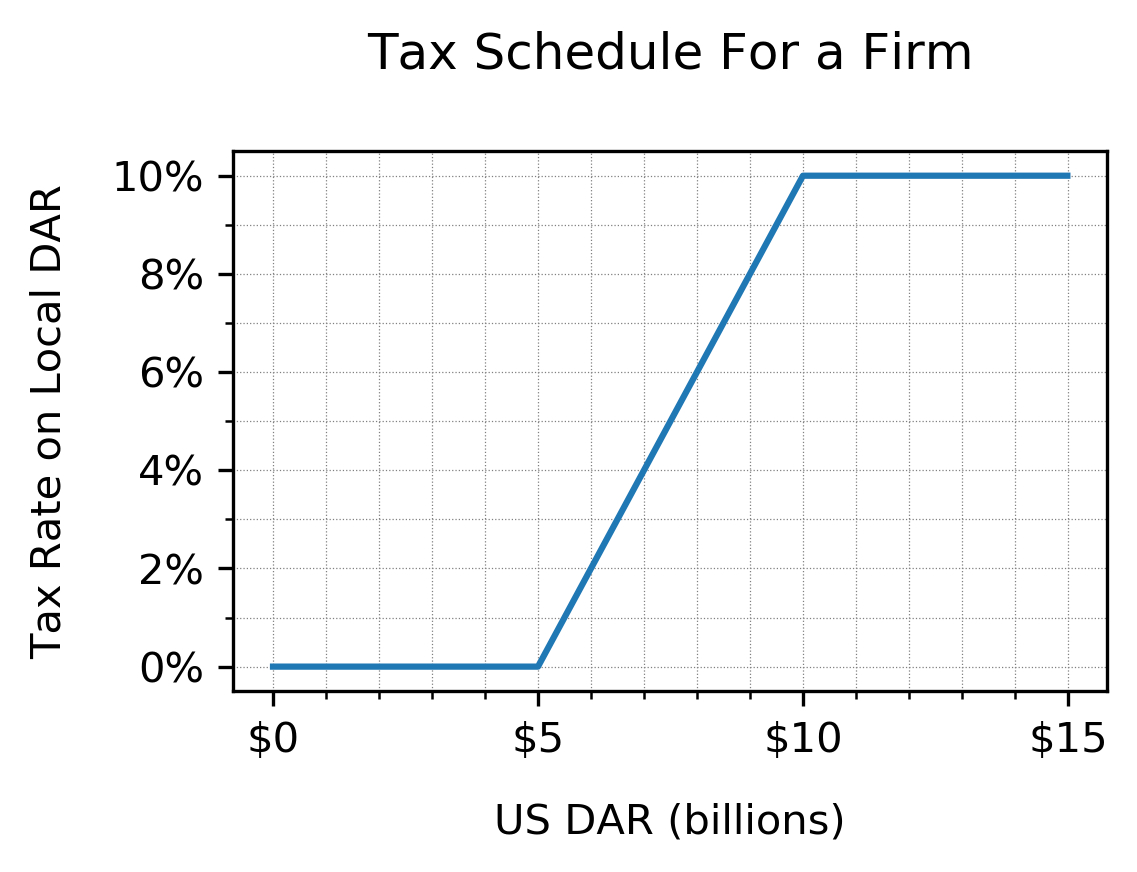

In [7]:
plt_tax_rate(ra, ta)

In [8]:
# tax_receipts( ) calculates the estimated tax receipts for a state. 
#   It uses Maryland as the default state. 


def tax_receipts(ra, ta, usdar, code = "MD"):
    tr = [0.0, 0.0, 0.0]
    for r in usdar.values():
        tr[0] += tax_rate(r[0]*10**(-9), ra, ta) * r[0] * local_share[code]
        tr[1] += tax_rate(r[1]*10**(-9), ra, ta) * r[1] * local_share[code]
        tr[2] += tax_rate(r[2]*10**(-9), ra, ta) * r[2] * local_share[code]       
    return tr


In [19]:
for r in tax_receipts(ra, ta, usdar, code = "MD"):
    print("$"+format(r, ' >14,.0f'))

$   165,161,861
$   197,032,206
$   230,030,298


In [10]:
def totals(ra, ta, dar):
    t = np.array([0.0, 0.0, 0.0])
    for code in codes.values():
        t += np.array(tax_receipts(ra, ta, dar, code))
    return t
    

In [17]:
for t in totals(ra, ta, usdar):
  print("$"+format(t, ' >14,.0f'))

$ 8,817,600,037
$10,519,082,155
$12,280,772,022
